<a href="https://colab.research.google.com/github/dorian-goueytes/M1_SCE_TT_signal_S2/blob/main/TD2_Traitement_du_signal_avanc%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction :

Ce TD est la continuation du TD1. Il aborde des notions plus avancées de traitement du signal, toujours basé sur le contenu du cours.

## Structure et objectif :

Chaque section est constituée de un ou plusieurs exercices dont l'objectif est d'implémenter vous-même des concepts issus du cours (Convolution, filtrage, analyse temps-fréquence...).

Vous êtes encouragé.es à tenter de développer votre propre réponse aux consignes de chaques exercices. Vous pouvez solliciter l'aide du professeur pour cela.

Si l'exercice vous parait trop complexe vous pouvez regarder la solution proposée, et essayer de comprendre et de reproduire son fonctionnement.

Validez avec le professeur votre solution/compréhension de la solution avant de passer à l'exercice suivant.

## Dos and Don'ts :


*   Vous êtes encouragé.es à travailler en binôme/trinôme et à échanger entre vous
*   Vous êtes encouragé.es à utiliser vos notes de cours.
*   Vous pouvez faire des recherches web et utiliser Stack Overflow pour alimenter vos réponses.
*   **ChatGPT ou tout autre LLM sont strictement interdit**

L'objectif du TD est de vous mettre en position de réfléchir activement à des questions de traitement du signal **ET** de développer votre autonomie en Python. Chaque exercice peut aisément être résolu par ChatGPT, mais votre apprentissage en sera diminué.

Les solutions aux exercices sont fournies dans le document, et vous êtes **très fortement encouragé.es à solliciter le professeur** en cas de blocage/difficulté à comprendre un exercice.

# Importation des bibliothèques Python nécessaires

Il existe de nombreuses bibliothèques Python dédiés au traitement du signal. L'objectif aujourd'hui d'implémenter nous même des algorithmes de traitement du signal, et nous n'utiliserons donc pas ces bibliothèques, sauf à des fins de vérification



In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#  Transformée de Fourier Discrète

L'objectif de ce segment est d'implémenter manuellement une convolution discrète, et d'appliquer ce principe au filtrage de donnée bruitées

#  Convolution et Filtrage

L'objectif de ce segment est d'implémenter manuellement une convolution discrète, et d'appliquer ce principe au filtrage de donnée bruitées

## Création d'un signal complexe

In [ ]:
# Parameters
fe = 1000  # samples per second
duration = 1       # seconds
time = np.linspace(0,duration, fe)

amp1 = 3
freq1 = 10
amp2 = 0.3
freq2 = 3
amp3 = 1
freq3 = 25

sin1 = [amp1 * math.sin(2 * math.pi * freq1 * t) for t in time]
sin2 = [amp2 * math.sin(2 * math.pi * freq2 * t) for t in time]
sin3 = [amp3 * math.sin(2 * math.pi * freq3 * t) for t in time]
sin_comp = np.array(sin1)+np.array(sin2)+np.array(sin3)


plt.figure()
plt.plot(time, sin1, alpha = 0.3)
plt.plot(time, sin2, alpha = 0.3)
plt.plot(time, sin3, alpha = 0.3)
plt.plot(time,sin_comp )
plt.xlabel("Temps (s)")
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### Exercice 0.1 : Décomposition du signal via Transformée de Fourier Discrète (TFD)

En vous basant sur la formule données dans le cours (voir ci-dessous) et sur vos propres recherches au besoin, implémentez une transformée de fourier discrète et appliquez là au signal complexe généré ci-dessus

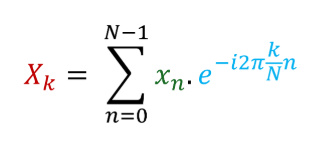


In [ ]:
# Ecrivez votre code ici (indice : N  = K = nombre d'échantillon de notre signal complexe)

#### **Solution**

In [ ]:
def dft(signal):
  N = len(signal)
  temp_TFD = []
  for k in range(N):
      sum = 0
      for n in range(N):
          sum+= signal[n]* np.exp(-1j * (2 * np.pi * k/N * n))
      temp_TFD.append(sum)

  TFD = np.array([abs(temp_TFD[k]) / (N/2) for k in range(N)])  # Normalization step
  return TFD[0:int(N/2)]

TFD = dft(sin_comp)
plt.plot(TFD, marker = 'o')
plt.xlim(0,30)
plt.hlines(amp1, 0,  freq1, color = 'k', linestyle = '--')
plt.vlines(freq1, 0,  amp1, color = 'k', linestyle = '--')

plt.hlines(amp2, 0,  freq2, color = 'k', linestyle = '--')
plt.vlines(freq2, 0,  amp2, color = 'k', linestyle = '--')

plt.hlines(amp3, 0,  freq3, color = 'k', linestyle = '--')
plt.vlines(freq3, 0,  amp3, color = 'k', linestyle = '--')
plt.grid()
plt.show()

### Exercice 0.2 : Reconstruire un signal depuis sa TFD

A partir de la transformée de Fourier discrète obtenue à l'exercice précédent, extrayez les composantes pures de notre signal complexe, et reconstruisez le signal original à partir de ces informations

In [ ]:
# Ecrivez votre code ici

#### **Solution**

In [ ]:
fig,(ax1, ax2, ax3) = plt.subplots(3,1, figsize = (12,8))
ax1.plot(time,sin_comp)
ax1.plot(time, sin1, alpha = 0.3)
ax1.plot(time,sin2, alpha = 0.3)
ax1.plot(time, sin3, alpha = 0.3)
ax1.grid()
ax1.set_title("Original signal")


## Extraction des composantes du signal original à partir de la transformée de Fourier
freq_content = np.where(TFD>0.01)[0] #Le contenu fréquentiel du signal original correspond à la partie non-nulle de la TFD
amp_content = TFD[freq_content] #Les ordonnées de la TFD correspondent à l'amplitude de chaque fréquence dans le signal original

print("Liste des fréquences détectées : ", freq_content)
print("Liste des amplitudes correspondantes : ", amp_content)

recon_signal = np.zeros(len(sin_comp))# On initie un signal reconstruit de valeur constante 0 qui à le même nombre d'échantillon que le signal original
for spec in range(0, len(freq_content)): #Pour chaque fréquence détectée par la TFD...
  ax2.plot(time, [amp_content[spec] * math.sin(2 * math.pi * freq_content[spec] * t) for t in time], alpha = 0.3) #..on plotte une sinusoïde pure correspondant à ces caractéristiques...
  recon_signal = recon_signal+ [amp_content[spec] * math.sin(2 * math.pi * freq_content[spec] * t) for t in time] #...et on ajoute cette sinusoïde à notre signal reconstruit

ax2.plot(time, recon_signal)
ax2.set_title("Reconstructed signal")
ax2.grid()

ax3.plot(time, sin_comp)
ax3.plot(time, recon_signal)
ax3.plot(time, sin_comp-recon_signal, label = 'Difference between original and recon signal')
ax3.set_title('Original and reconstructed signal overlayed')
ax3.grid()
ax3.legend()
plt.tight_layout()
plt.show()

#### Question : Observez-vous une différence entre le signal original et le signal reconstruit? Si oui, expliquez la cause de ce phénomène

In [ ]:
## Ecrivez votre réponse ici

### Exercice 1 : Générer un signal bruité

Dans un premier temps nous allons créer un signal bruité sur lequel nous allons appliquer nos convolutions. Créez un signal sinusoïdal durant 5 secondes avec une fréquence de 4Hz et un taux d'échantillonnage de 200Hz. Créez ensuite une version bruité de ce signal

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
# Parameters
fs = 200  # Sampling frequency
f = 4     # Frequency of the sine wave
duration = 2  # seconds
time = np.linspace(0, duration, fs*duration)

# Generate pure sine wave
#sine_wave = np.sin(2 * math.pi * f * time)
sine_wave = 0.1 * np.sin(2 * math.pi * f * time)

# Création d'une composante alétoire (bruit)
#noise = 0.5 * np.random.normal(size=time.shape) #le bruit est généré en échantillonnant des nombres aléatoires depuis une distribution normale
noise = 0.05 * np.random.normal(size=time.shape) #le bruit est généré en échantillonnant des nombres aléatoires depuis une distribution normale
# Addition du bruit à notre signal originale
noisy_signal = sine_wave + noise

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = True, figsize = (10,5))
ax1.plot(time, sine_wave)
ax1.set_title("Original pure sine wave")
ax1.set_ylabel("Amplitude")
ax1.grid()

ax2.plot(time, noise)
ax2.set_title("Artificial noise over time")
ax2.set_ylabel("Amplitude")
ax2.grid()

ax3.plot(time, noisy_signal)
ax3.set_title("Signal Bruité")
ax3.set_xlabel("Temps (s)")
ax3.set_ylabel("Amplitude")
ax3.grid()

plt.tight_layout()
plt.show()


### Exercice 2 : Générer une fonction square

Générer une fonction square de largeur 50ms et d'amplitude

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
# Define square pulse (moving average filter)
pulse_duration = 0.05 #Durée de la fonction square en secondes
pulse_width = int(pulse_duration*fs)  # Number of samples in the pulse
time_pulse = np.arange(0, pulse_width) / fs  # Time axis for square pulse
square_pulse = np.ones(pulse_width) /pulse_width

plt.stem(time_pulse,square_pulse)
plt.title('Square Pulse (Filter Kernel) in Time')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### Exercice 3 : Convoluez le signal bruité avec la fonction square.

Vous pouvez utiliser la formule suivante issue du cours

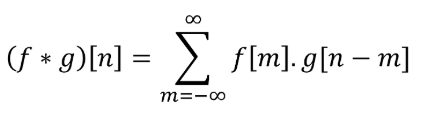

In [ ]:
# Ecrivez votre code ici

#### Solution

In [ ]:
convolved_signal = []
pad_size = len(square_pulse) // 2
padded_signal = np.hstack((np.zeros(pad_size), noisy_signal, np.zeros(pad_size)))

for i in range(0, len(padded_signal)-len(square_pulse)):
    sum_value = 0
    for j in range(0, len(square_pulse)):
        sum_value += padded_signal[i + j] * square_pulse[j]
    convolved_signal.append(sum_value)



#filtered_signal = np.convolve(noisy_signal, square_pulse, mode='same')
fig, (ax1,ax2) = plt.subplots(2,1, sharex = True, figsize = (10,5))
ax1.plot(time, noisy_signal, linestyle = '-', alpha = 0.5)
ax1.plot(time,sine_wave)
ax1.set_title('Superposition du signal pur et du signal bruité')
ax1.set_ylabel('Amplitude')
ax1.grid()
ax2.plot(time, noisy_signal, linestyle = '-', alpha = 0.5)
ax2.plot(time,convolved_signal)
ax2.set_title('Superposition du signal bruité et du produit de convolution')
ax2.set_xlabel('Temps (s)')
ax2.set_ylabel('Amplitude')
ax2.grid()
plt.tight_layout()
plt.show()

#### Bonus : Vous pouvez utiliser le code ci-dessous pour visualiser la convolution de notre square puls avec notre signal d'intérêt au cours du temps

**Warning :** l'exécution de la cellule peut prendre entre 45 et 60 secondes

In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc

rc('animation', html='jshtml')

# --- Ensure consistent time axis ---
N = len(noisy_signal)
time = np.arange(N) / fs
M = len(square_pulse)

convolved_signal = np.convolve(
    noisy_signal,
    square_pulse,
    mode='same'
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Signal
ax1.plot(time, noisy_signal,
         alpha=0.4,
         label="Noisy signal")

# Kernel rectangle (initialized empty)
kernel_patch = ax1.fill_between([], [], [],
                                color='red',
                                alpha=0.4,
                                label="Square pulse")

ax1.set_xlim(time[0], time[-1])
ax1.set_ylim(np.min(noisy_signal)*1.2,
             np.max(noisy_signal)*1.2)

ax1.set_title("Sliding Square Pulse (Convolution Kernel)")
ax1.set_ylabel("Amplitude")
ax1.grid()
ax1.legend()

# Convolution output
conv_line, = ax2.plot([], [],
                      'g',
                      lw=2,
                      label="Filtered signal")

ax2.set_xlim(time[0], time[-1])
ax2.set_ylim(np.min(convolved_signal)*1.2,
             np.max(convolved_signal)*1.2)

ax2.set_title("Convolution Output")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")
ax2.grid()
ax2.legend()


def update(frame):

    global kernel_patch
    kernel_patch.remove()   # remove previous rectangle

    # Kernel support
    start = frame - M//2
    idx = np.arange(M) + start

    valid = (idx >= 0) & (idx < N)

    t_kernel = time[idx[valid]]

    # True kernel amplitude (scaled only for visibility)
    #amp = square_pulse[valid] * np.max(noisy_signal)

    kernel_patch = ax1.fill_between(
        t_kernel,
        0,
        np.max(square_pulse),
        color='red',
        alpha=0.4
    )

    # Progressive convolution
    conv_line.set_data(time[:frame],
                       convolved_signal[:frame])

    return kernel_patch, conv_line


anim = FuncAnimation(fig,
                     update,
                     frames=N,
                     interval=40,
                     blit=True)

plt.close(fig)
anim


### Exercice 4 : Effet de la durée de la fonction square

Répetez les exercices 2 et 3 faisant varier la durée de la fonction square. Qu'observez-vous?

In [ ]:
# Ecrivez votre code ici

### Question :  D'après le cours et vos propres recherches, à quelle opération correspond la convolution d'un signal par une fonction square?

In [ ]:
# Votre réponse ici

## Exercice 5 : Utiliser la convolution pour filtrer un signal

Dans l'exercice suivant la fonction butterworth_impulse_response vous permet d'obtenir la réponse impulsionnelle d'un filtre de butterworth passe-bas

En vous basant sur le cours, utiliser la réponse à l'exercice sur la convolution pour appliquer ce filtre à notre signal bruité

In [ ]:
def butterworth_impulse_response(fs, num_samples, cutoff=6, order=2):
    import scipy.signal as signal
    b, a = signal.butter(order, cutoff, btype='low', analog=False, fs = fs)
    impulse = np.zeros(num_samples)
    impulse[0] = 1  # Define impulse input
    impulse_response = signal.lfilter(b, a, impulse)

    w, h = signal.freqz(b)

    return  [w,h], impulse_response

# Example usage
filter_duration = 0.2 #Durée temporelle de notre filtre
num_samples = int(fs*filter_duration)  # Nombre d'échantillon de notre réponse impulsionnelle
transfer_function, impulse_response = butterworth_impulse_response(fs, num_samples,cutoff = 6, order = 5) # Cette fonction retourne à la fois la
                                                                                                  #la réponse impulsionnelle et la fonction de
                                                                                                #transfert d'un filtre de Butterworth en fonction des
                                                                                                #paramètres fournis

In [ ]:
# Votre réponse ici

#### Solution

In [ ]:
## Convolution de notre signal avec la réponse impulsionnelle (note, il s'agit exactement de la même formule de convolution
## que dans l'exercice 3)
convolved_signal = []
pad_size = len(impulse_response) // 2
padded_signal = np.hstack((np.zeros(pad_size), noisy_signal, np.zeros(pad_size)))
for i in range(0, len(padded_signal)-len(impulse_response)):
    sum_value = 0
    for j in range(0, len(impulse_response)):
        sum_value += padded_signal[i + j] * impulse_response[j]
    convolved_signal.append(sum_value)


fig = plt.figure(figsize = (10,5))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ax1.plot(impulse_response)
ax1.set_xlabel('Temps (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title("Fonction impulsionnelle")
ax1.grid()
ax2.plot(transfer_function[0], np.log10(abs(transfer_function[1])))
ax2.set_xlabel('Fréquence (Hz)')
ax2.set_ylabel('Atténuation')
ax2.set_title("Fonction de Transfert")
ax2.grid()
ax3.plot(time, noisy_signal, label = 'Or. Signal')
ax3.plot(time, convolved_signal, label = 'Filt. Signal')
ax3.set_xlabel('Temps (s)')
ax3.set_ylabel('Amplitude')
ax3.set_title("Signal original et signal filtré")
ax3.grid()
ax3.legend()
plt.tight_layout()
plt.show()

### Question : Qu'observez-vous si vous utiliser une fréquence de cut-off inférieure à la fréquence de notre sinusoïde pure (par exemple 2)? Expliquez ce résultat.

In [ ]:
# Votre réponse

# Analyse Temps-Fréquence

### Exercice 6 :  Génération d'un signal non stationnaire complexe

Générez un signal non-stationnaire échantillonné à 200Hz ayant 3 segments de 1 secondes chacun composé de 3 sinusoïdes pures ayant des caractéristiques différentes

In [ ]:
# Votre réponse

#### Solution

In [ ]:
fs = 200  # Fréquence d'échantillonnage
T = 3     # Duré du signal
N = fs * T  # Nombre d'échantillon
time = np.linspace(0, T, N)  # Time vector

# Time segments for the composite signal
segment_duration = 1  # Duration of each segment in seconds
segment_samples = int(fs * segment_duration)  # Number of samples per segment

# Frequencies and amplitudes for each segment
segments = [
    [(3, 0.8), (50, 0.2), (32, 0.5)],  # Segment 1: 3Hz, 50Hz, 32Hz
    [(55, 0.9), (11, 0.3), (70, 0.1)],  # Segment 2: 5Hz, 30Hz, 70Hz
    [(14, 0.6), (28, 0.4), (2, 0.2)],  # Segment 3: 10Hz, 60Hz, 100Hz
]

# Create a non-stationary signal by concatenating different composite signals
ns_signal = np.zeros_like(time)
for i, segment in enumerate(segments):
    # Time segment range
    start_idx = i * segment_samples
    end_idx = start_idx + segment_samples
    time_segment = time[start_idx:end_idx]

    # Add sinusoids to the segment
    segment_signal = np.zeros_like(time_segment)
    for freq, amp in segment:
        segment_signal += amp * np.sin(2 * np.pi * freq * time_segment)

    # Add the segment signal to the overall signal
    ns_signal[start_idx:end_idx] = segment_signal

# Plot signal in time domain
plt.figure(figsize = (10,5))
plt.plot(time, ns_signal)
plt.title("Signal Non-stationnaire")
plt.ylabel("Amplitude")
plt.xlabel("Temps (s)")
plt.axvline(1, color =  'k', linestyle = '--')
plt.axvline(2, color =  'k', linestyle = '--')
plt.grid()
plt.show()

### Exercice 7 : Générer un spectrogramme

En utilisant la fonction scipy.signal stft, appliquez une short-time Fourier transform à notre signal non stationnaire, et générer un graph du contenu fréquentiel au cours du temps.

(La Short-Time Fourier Transform est un algorithme permettant de calculer rapidement la Transformée de Fourier Discrète dans un intervalle de temps court)

In [ ]:
 # Votre réponse

#### Solution

In [ ]:
from scipy.signal import stft

# Application de la Short-Time Fourier Transform (STFT) via scipy's stft
window_duration = 0.5# Durée de la fenêtre dans laquelle chaque fft sera calculée
window_size = int(window_duration*fs) # Nombre d'échantillon correspondant à notre fenêtre
overlap = window_size // 2  # Overlap entre nos fenêtres d'analyse

# Compute STFT
f_stft, t_stft, Zxx = stft(ns_signal, fs, nperseg=window_size, noverlap=overlap)

# Plot signal in time domain
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10, 8), sharex = True)

# Subplot 1: Time-domain signal
ax1.plot(time, ns_signal)
ax1.set_title("Signal Non-stationnaire")
ax1.set_ylabel("Amplitude")
ax1.axvline(1, color =  'k', linestyle = '--')
ax1.axvline(2, color =  'k', linestyle = '--')
ax1.grid()

# Subplot 2: Power Spectrum over Time (Spectrogram)
ax2.pcolormesh(t_stft, f_stft, np.abs(Zxx)**2)  # Power spectrum (magnitude squared)
ax2.set_title("Spectrogramme")
ax2.set_xlabel("Temps [s]")
ax2.set_ylabel("Fréquence [Hz]")
ax2.axvline(1, color =  'w', linestyle = '--')
ax2.axvline(2, color =  'w', linestyle = '--')
c = ax2.pcolor(t_stft, f_stft, np.abs(Zxx)**2)
fig.colorbar(c, ax=ax2,orientation='horizontal', label = 'Power')
ax2.grid()

plt.tight_layout()
plt.show()


#### Question : Quel effet observez vous lorsque vous manipulez la durée de la fenêtre durant laquelle chaque transformée de Fourier est appliquée?

In [ ]:
# Votre réponse